In [8]:
%load_ext autoreload
%autoreload 2
from __future__ import print_function
import matplotlib.pyplot as plt
from enlib import enmap,resample
import numpy as np
import os,sys

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(60, 60) (60, 60)


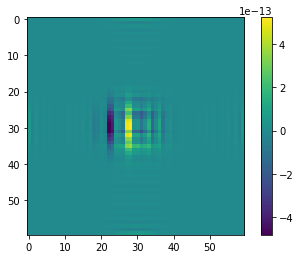

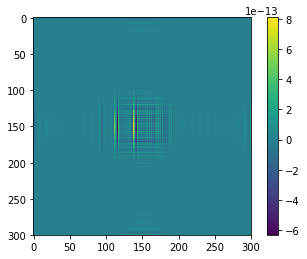

In [14]:

arc = 30.*np.pi/180./60. # 30 arcmin wide stamp
px = 0.1*np.pi/180./60.  # high resolution pixel size
dpx = 0.5*np.pi/180./60. # low resolution pixel size

# high res geometry
shape,wcs = enmap.geometry(pos=[[-arc/2.,-arc/2.],[arc/2.,arc/2.]],res=px)
modrmap = enmap.modrmap(shape,wcs)
sigma = 2.0*np.pi/180./60.
a = np.exp(-modrmap**2./2./sigma**2.) # test gaussian

# downsampled shape (factor of 5)
dshape0 = tuple((np.array(shape)*(px/dpx)).astype(np.int))

# downsampled gaussian
b = enmap.resample(a,dshape0,method="fft")
a1 = enmap.resample(b,shape,method="fft")

# downsampled geometry
dshape,dwcs = enmap.geometry(pos=[[-arc/2.,-arc/2.],[arc/2.,arc/2.]],res=dpx)
print(dshape0,dshape) # check shapes match

# create low res gaussian native to this geometry
dmodrmap = enmap.modrmap(dshape,dwcs)
c = np.exp(-dmodrmap**2./2./sigma**2.)

# plot difference of native to downsampled
plt.imshow(c-b)
plt.colorbar()
plt.show()
plt.imshow(a1-a)
plt.colorbar()
plt.show()